## Using Data to Improve MLB Attendance

Within the 'dodgers-2022.csv', we are provided with a dataset that displays the opponents playing on that day, the date, temperature, weather, time of day, and other characteristics of that day that may impact a visitors experience. With one goal in mind, being, to bring in more visitors to the games so that their is a higher profit from the games, we can dissect this dataset to be able to understand what factors inpact attendace. The following code is the analysis of this dataset in order to find supporting evidence that certain opposing teams bring in more fans than othes.

In [1]:
import pandas as pd
import numpy as np

In [2]:
dodgers_df = pd.read_csv('dodgers-2022.csv')

In [3]:
dodgers_df.head()

,month,day,attend,day_of_week,opponent,temp,skies,day_night,cap,shirt,fireworks,bobblehead
0,APR,10,56000,Tuesday,Pirates,67,Clear,Day,NO,NO,NO,NO
1,APR,11,29729,Wednesday,Pirates,58,Cloudy,Night,NO,NO,NO,NO
2,APR,12,28328,Thursday,Pirates,57,Cloudy,Night,NO,NO,NO,NO
3,APR,13,31601,Friday,Padres,54,Cloudy,Night,NO,NO,YES,NO
4,APR,14,46549,Saturday,Padres,57,Cloudy,Night,NO,NO,NO,NO


In [4]:
#check for null values (non)
dodgers_df.isnull().sum()
dodgers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   month        81 non-null     object
 1   day          81 non-null     int64 
 2   attend       81 non-null     int64 
 3   day_of_week  81 non-null     object
 4   opponent     81 non-null     object
 5   temp         81 non-null     int64 
 6   skies        81 non-null     object
 7   day_night    81 non-null     object
 8   cap          81 non-null     object
 9   shirt        81 non-null     object
 10  fireworks    81 non-null     object
 11  bobblehead   81 non-null     object
dtypes: int64(3), object(9)
memory usage: 7.7+ KB


In [5]:
d_df = dodgers_df[['bobblehead', 'fireworks', 'shirt', 'cap', 'day_night']]

d_df = pd.get_dummies(d_df)

In [6]:
dodgers_df.drop(['bobblehead', 'fireworks', 'shirt', 'cap', 'day_night'], axis=1)

,month,day,attend,day_of_week,opponent,temp,skies
0,APR,10,56000,Tuesday,Pirates,67,Clear
1,APR,11,29729,Wednesday,Pirates,58,Cloudy
2,APR,12,28328,Thursday,Pirates,57,Cloudy
3,APR,13,31601,Friday,Padres,54,Cloudy
4,APR,14,46549,Saturday,Padres,57,Cloudy
...,...,...,...,...,...,...,...
76,SEP,29,40724,Saturday,Rockies,84,Cloudy
77,SEP,30,35607,Sunday,Rockies,95,Clear
78,OCT,1,33624,Monday,Giants,86,Clear
79,OCT,2,42473,Tuesday,Giants,83,Clear


In [7]:
# transforming categorical data into numerical data
dodgers_df[['bobblehead', 'fireworks', 'shirt', 'cap', 'Day time', 'Night time']] = d_df[['bobblehead_YES', 'fireworks_YES', 'shirt_YES',
                                                                                          'cap_YES', 'day_night_Day', 'day_night_Night']]

In [8]:
from sklearn.preprocessing import LabelEncoder
 
# Creating a instance of label Encoder.
le = LabelEncoder()
 
# Using .fit_transform function to fit label  / encoder and return encoded label
# Dow
dow = le.fit_transform(dodgers_df['day_of_week'])
inverted_dow = le.inverse_transform(dow)
dodgers_df['day_of_week'] = dow
# month
month = le.fit_transform(dodgers_df['month'])
inverted_month = le.inverse_transform(month)
dodgers_df['month'] = month
# skies
skies = le.fit_transform(dodgers_df['skies'])
inverted_skies = le.inverse_transform(skies)
dodgers_df['skies'] = skies
# opponent
opponent = le.fit_transform(dodgers_df['opponent'])
inverted_opponent = le.inverse_transform(opponent)

dodgers_df['opponent'] = opponent

In [9]:
#key dataframe
key = dow, inverted_dow, month, inverted_month, skies, inverted_skies, opponent, inverted_opponent
key

(array([5, 6, 4, 0, 2, 3, 1, 5, 6, 0, 2, 3, 1, 5, 6, 0, 2, 3, 1, 5, 0, 2,
        3, 0, 2, 3, 1, 5, 6, 4, 1, 5, 6, 0, 2, 3, 4, 0, 2, 3, 1, 5, 6, 0,
        2, 3, 1, 5, 6, 1, 5, 6, 0, 2, 3, 1, 5, 6, 1, 5, 6, 0, 2, 3, 4, 0,
        2, 3, 1, 5, 6, 4, 0, 2, 3, 0, 2, 3, 1, 5, 6]),
 array(['Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday',
        'Monday', 'Tuesday', 'Wednesday', 'Friday', 'Saturday', 'Sunday',
        'Monday', 'Tuesday', 'Wednesday', 'Friday', 'Saturday', 'Sunday',
        'Monday', 'Tuesday', 'Friday', 'Saturday', 'Sunday', 'Friday',
        'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday',
        'Monday', 'Tuesday', 'Wednesday', 'Friday', 'Saturday', 'Sunday',
        'Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday',
        'Wednesday', 'Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday',
        'Wednesday', 'Monday', 'Tuesday', 'Wednesday', 'Friday',
        'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'M

In [10]:
# dropping unneccessary feature
dodgers_df.drop(['day_night'], axis=1, inplace=True)

In [11]:
dodgers_df

,month,day,attend,day_of_week,opponent,temp,skies,cap,shirt,fireworks,bobblehead,Day time,Night time
0,0,10,56000,5,12,67,0,0,0,0,0,1,0
1,0,11,29729,6,12,58,1,0,0,0,0,0,1
2,0,12,28328,4,12,57,1,0,0,0,0,0,1
3,0,13,31601,0,10,54,1,0,0,1,0,0,1
4,0,14,46549,2,10,57,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,6,29,40724,2,14,84,1,0,0,0,0,0,1
77,6,30,35607,3,14,95,0,0,0,0,0,1,0
78,5,1,33624,1,6,86,0,0,0,0,0,0,1
79,5,2,42473,5,6,83,0,0,0,0,0,0,1


In [12]:
# Assigning variable names for target and features
X = dodgers_df
y = dodgers_df[['opponent']]

In [13]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   month        81 non-null     int64
 1   day          81 non-null     int64
 2   attend       81 non-null     int64
 3   day_of_week  81 non-null     int64
 4   opponent     81 non-null     int64
 5   temp         81 non-null     int64
 6   skies        81 non-null     int64
 7   cap          81 non-null     uint8
 8   shirt        81 non-null     uint8
 9   fireworks    81 non-null     uint8
 10  bobblehead   81 non-null     uint8
 11  Day time     81 non-null     uint8
 12  Night time   81 non-null     uint8
dtypes: int64(7), uint8(6)
memory usage: 5.0 KB


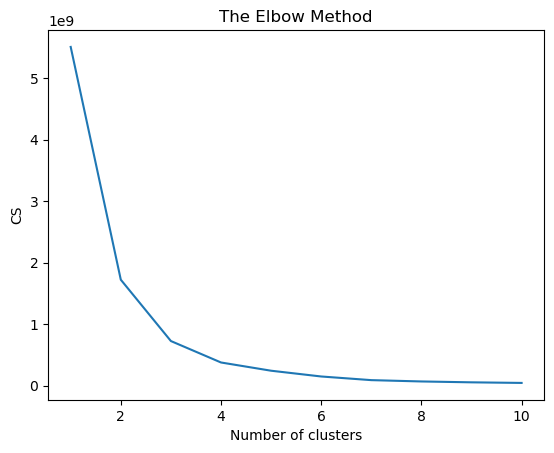

In [14]:
# Impoting Kmeans to identify clusters of data objects in the dataset
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
# plotting number of clusters
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

In [15]:
# splitting the data into a testing set and training set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [16]:
# normalizing the data by converting the raw data into a clean data set
from sklearn import preprocessing

X_train_norm = preprocessing.normalize(X_train)
X_test_norm = preprocessing.normalize(X_test)

In [17]:
# Applying kmeans algorithm 
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 4, random_state = 0, n_init='auto')
kmeans.fit(X_train_norm)

KMeans(n_clusters=4, n_init='auto', random_state=0)

In [18]:
X

,month,day,attend,day_of_week,opponent,temp,skies,cap,shirt,fireworks,bobblehead,Day time,Night time
0,0,10,56000,5,12,67,0,0,0,0,0,1,0
1,0,11,29729,6,12,58,1,0,0,0,0,0,1
2,0,12,28328,4,12,57,1,0,0,0,0,0,1
3,0,13,31601,0,10,54,1,0,0,1,0,0,1
4,0,14,46549,2,10,57,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,6,29,40724,2,14,84,1,0,0,0,0,0,1
77,6,30,35607,3,14,95,0,0,0,0,0,1,0
78,5,1,33624,1,6,86,0,0,0,0,0,0,1
79,5,2,42473,5,6,83,0,0,0,0,0,0,1


<Axes: xlabel='attend', ylabel='opponent'>

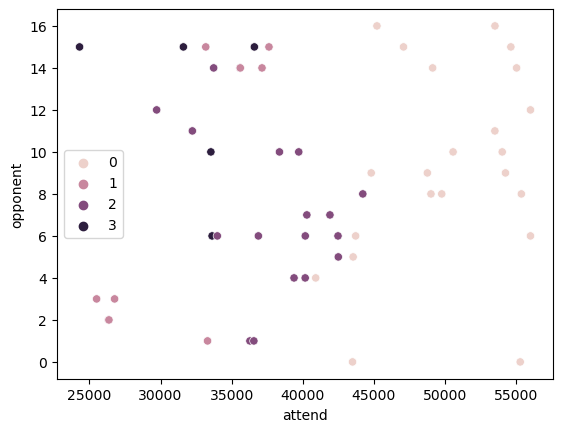

In [20]:
# Creating scatter plot to visualize the clusters 
import seaborn as sns

sns.scatterplot(data = X_train, x = 'attend', y = 'opponent', hue = kmeans.labels_)

In [29]:
# training a DescisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
dtree_model = DecisionTreeClassifier(max_depth = 2).fit(X_train, y_train)
dtree_predictions = dtree_model.predict(X_test)
  
# creating a confusion matrix
cm = confusion_matrix(y_test, dtree_predictions)
print(cm)

[[0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 2 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 4 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 2 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 4 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 3 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 3 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 2 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1]]


In [26]:
# creating a confusion matrix display
from sklearn import metrics

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])

ValueError: The number of FixedLocator locations (14), usually from a call to set_ticks, does not match the number of labels (2).

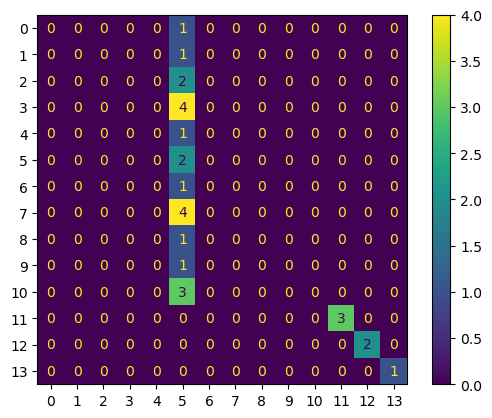

In [36]:
# visualizing the display
import matplotlib.pyplot as plt
cm_display.plot()
plt.show()

In this analysis, the data had to be prepared first befor any model could be applied. By checking for any null on NA values, the analyst is able to remove unneccessary or even useless values. After checking for missing data, categorical data was transformed into quantitative data for the model. A label encoder from sklearn was used to alter the data, a key was also saved to be able to understand the numerical data created from the categorical data. once the data was prepared, a training and test set were split and derived from the dataset in order to apply Kmeans to retrieve clusters in the data. The value of K was decided to be 4 using a linear chart using the elbow method to decide the most significant value of k. 

In the seaborn scatter plot shown above, the 4 clusters can be seen. We can also visually verify that with opponents falling higher on the their numerical value, experienced a higher volume of attendance. Opponents 6-16 had the most supporting fans, these opponents were as follow; Pirates, Padres, nationals, giants, rockies, snakes, white sox, mets, and reds.

Overall, a decision tree classifier was used to predict the opponents in the games by learning simple decision rules inferred from the data features, a confusion matrix was then used on this model to help determine the model's performance. The confusion matrix displayed a column of values with a few values in the bottom right corner, this display brought a few questions to mind regarding the model's performance. It was found that opponents with a higher fan base cause the attendance of the game to be much higher than smaller opposing teams with a small fan bases.